In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
plt.style.use('ggplot')
import networkx as nx
# from node2vec import Node2Vec

df = pd.read_csv('bank.csv',sep=';')

In [2]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [3]:
df.age = df.age.apply(lambda x: 0 if x < 25 else(1 if x < 35 else(2 if x < 50 else(3 if x < 65 else 4))))

df.job = df.job.apply(lambda x: 0 if x == 'unemployed' else(1 if x == 'services' \
                            else(2 if x == 'management' else(3 if x == 'blue-collar' \
                                else(4 if x == 'self-employed' else(5 if x == 'technician' \
                                    else(6 if x == 'entrepreneur' else(7 if x == 'admin.' \
                        else(8 if x =='student' else(9 if x == 'housemaid' \
                            else(10 if x == 'retired' else 11)))))))))))

df.marital = df.marital.apply(lambda x: 0 if x == 'single' else(1 if x == 'married' else 2))

df.education = df.education.apply(lambda x: 0 if x == 'primary' else(1 if x == 'secondary' else(2 if x == 'tertiary' else 3)))

df.default = df.default.apply(lambda x: 0 if x == 'no' else 1)

df.balance = df.balance.apply(lambda x: 0 if x < 0 else(1 if x < 69. else(2 if x < 444. else(3 if x < 1480 else 4))))

df.housing = df.housing.apply(lambda x: 0 if x == 'no' else 1)

df.loan = df.loan.apply(lambda x: 0 if x == 'no' else 1)

df.contact = df.contact.apply(lambda x: 0 if x == 'telephone' else(1 if x == 'cellular' else 2))

df.duration = df.duration.apply(lambda x: 0 if x < 104. else(1 if x < 185 else(2 if x < 329 else 3)))

df.pdays = df.pdays.apply(lambda x: 0 if x < 50 else 0)

df.poutcome = df.poutcome.apply(lambda x: 0 if x == 'failure' else(1 if x == 'success' else 2))

df.y = df.y.apply(lambda x: 0 if x == 'no' else 1)

df.drop(columns = ['day','month'],inplace=True)


In [4]:
df

,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,y
0,1,0,1,0,0,4,0,0,1,0,1,0,0,2,0
1,1,1,1,1,0,4,1,1,1,2,1,0,4,0,0
2,2,2,0,2,0,3,1,0,1,2,1,0,1,0,0
3,1,2,1,2,0,3,1,1,2,2,4,0,0,2,0
4,3,3,1,1,0,1,1,0,2,2,1,0,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,1,1,1,1,0,0,1,0,1,3,5,0,0,2,0
4517,3,4,1,2,1,0,1,1,2,1,1,0,0,2,0
4518,3,5,1,1,0,2,0,0,1,1,11,0,0,2,0
4519,1,3,1,1,0,3,0,0,1,1,4,0,3,2,0


In [6]:
from sklearn.model_selection import train_test_split
y =  df.y
x = df.drop(columns='y')
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, shuffle=True)

In [9]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
x_train_tf = tf.convert_to_tensor(x_train)
x_test_tf = tf.convert_to_tensor(x_test)
y_train_tf = tf.convert_to_tensor(y_train)
y_test_tf = tf.convert_to_tensor(y_test)

model = Sequential()

model.add(Dense(15, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
#opt = tf.keras.optimizers.Adam(learning_rate=0.0001)

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(x_train_tf, y_train_tf,validation_data=(x_test_tf,y_test_tf), epochs=50, batch_size=5)

Epoch 1/50
362/362 [==============================] - 3s 5ms/step - loss: 0.4117 - accuracy: 0.8790 - val_loss: 0.3905 - val_accuracy: 0.8674
Epoch 2/50
362/362 [==============================] - 1s 3ms/step - loss: 0.3228 - accuracy: 0.8899 - val_loss: 0.3485 - val_accuracy: 0.8674
Epoch 3/50
362/362 [==============================] - 1s 4ms/step - loss: 0.3021 - accuracy: 0.8852 - val_loss: 0.3260 - val_accuracy: 0.8707
Epoch 4/50
362/362 [==============================] - 1s 3ms/step - loss: 0.2699 - accuracy: 0.8992 - val_loss: 0.3315 - val_accuracy: 0.8685
Epoch 5/50
362/362 [==============================] - 1s 3ms/step - loss: 0.2728 - accuracy: 0.8907 - val_loss: 0.3118 - val_accuracy: 0.8729
Epoch 6/50
362/362 [==============================] - 1s 4ms/step - loss: 0.2671 - accuracy: 0.8911 - val_loss: 0.3091 - val_accuracy: 0.8707
Epoch 7/50
362/362 [==============================] - 1s 4ms/step - loss: 0.2706 - accuracy: 0.8967 - val_loss: 0.3046 - val_accuracy: 0.8696
Epoch 

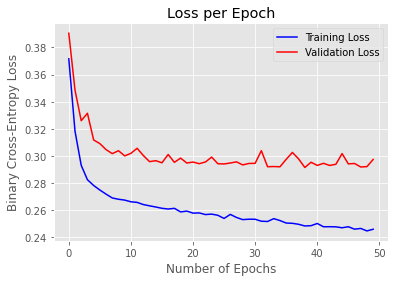

In [10]:
plt.plot(history.history['loss'],label = 'Training Loss', color = 'blue')
plt.plot(history.history['val_loss'],label = 'Validation Loss', color = 'red')
plt.xlabel('Number of Epochs')
plt.ylabel('Binary Cross-Entropy Loss')
plt.title('Loss per Epoch')
plt.legend()
plt.show()